In [159]:
import keras
import seaborn as sns
import numpy as np
import pandas as pd
from keras import layers

In [190]:
model = keras.Sequential(
    [
        layers.Dense(18, name="input"),
        layers.Dense(5, activation="sigmoid", name="hidden"),
        layers.Dense(1, activation = 'sigmoid', name="output")
    ]
)
model.layers

In [191]:
model.compile(optimizer='adam',loss = 'mean_squared_error',metrics=['accuracy'])

In [162]:
X_train = pd.read_csv('./trainX.csv')
Y_train = pd.read_csv('./trainY.csv')
X_train = X_train.iloc[:,1:]
Y_train = Y_train.iloc[:,1:]
X = np.array(X_train.values.tolist())
Y = np.array(Y_train.values.tolist())
X_val = pd.read_csv('./valX.csv')
Y_val = pd.read_csv('./valY.csv')
X_val = X_val.iloc[:,1:]
Y_val = Y_val.iloc[:,1:]
X_val = np.array(X_val.values.tolist())
Y_val = np.array(Y_val.values.tolist())


In [163]:
X_test = pd.read_csv('./testX.csv')
Y_test = pd.read_csv('./testY.csv')
X_test = X_test.iloc[:,1:]
Y_test = Y_test.iloc[:,1:]
X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())

In [192]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001,patience = 3)

In [193]:
history = model.fit(X_train,Y_train,batch_size=10,epochs=100,validation_data = (X_val,Y_val),callbacks=early_stopping)

Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.3764 - val_loss: 0.2519 - val_accuracy: 0.5730
Epoch 2/100
54/54 [==============================] - 0s 727us/step - loss: 0.2386 - accuracy: 0.6554 - val_loss: 0.2315 - val_accuracy: 0.7022
Epoch 3/100
54/54 [==============================] - 0s 726us/step - loss: 0.2245 - accuracy: 0.6966 - val_loss: 0.2203 - val_accuracy: 0.6854
Epoch 4/100
54/54 [==============================] - 0s 791us/step - loss: 0.2141 - accuracy: 0.7266 - val_loss: 0.2099 - val_accuracy: 0.7472
Epoch 5/100
54/54 [==============================] - 0s 711us/step - loss: 0.2033 - accuracy: 0.7566 - val_loss: 0.1984 - val_accuracy: 0.7472
Epoch 6/100
54/54 [==============================] - 0s 728us/step - loss: 0.1916 - accuracy: 0.7790 - val_loss: 0.1859 - val_accuracy: 0.7753
Epoch 7/100
54/54 [==============================] - 0s 801us/step - loss: 0.1804 - accuracy: 0.8015 - val_loss: 0.1738 - val_accuracy: 0.7809
E

[Text(0.5, 1.0, 'Validation Loss function'),
 Text(0.5, 0, 'Nr of epoch'),
 Text(0, 0.5, 'MSE Value')]

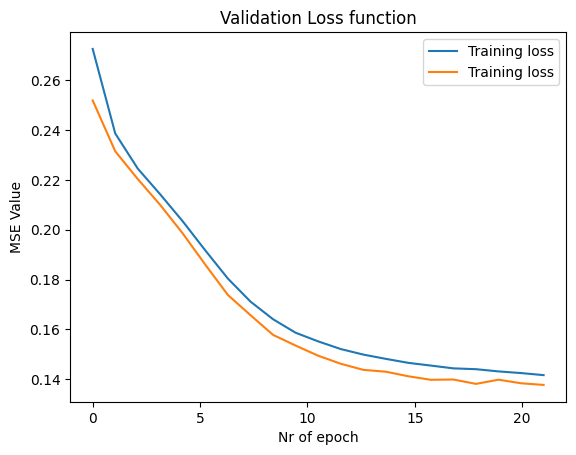

In [201]:
x=np.linspace(0,len(history.history['val_loss']),len(history.history['val_loss']))
sns.lineplot(x=x,y=history.history['loss'], label = 'Training loss').set(title='Training Loss function',xlabel = 'Nr of epoch',ylabel = "MSE Value")
sns.lineplot(x=x,y=history.history['val_loss'], label = 'Training loss').set(title='Validation Loss function',xlabel = 'Nr of epoch',ylabel = "MSE Value")

[Text(0.5, 1.0, 'Validation Accuracy'),
 Text(0.5, 0, 'Nr of epoch'),
 Text(0, 0.5, 'Accuracy')]

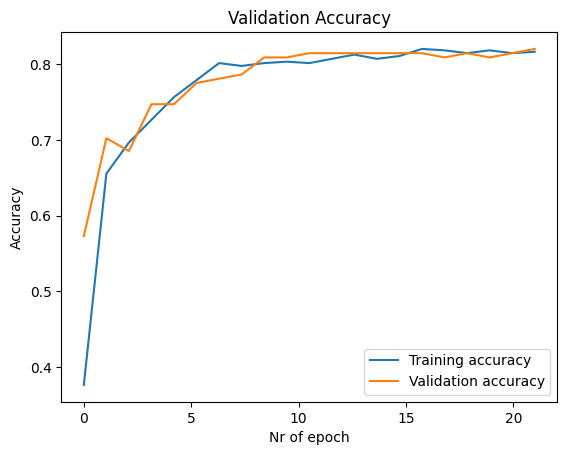

In [200]:
x=np.linspace(0,len(history.history['val_loss']),len(history.history['val_loss']))
sns.lineplot(x=x,y=history.history['accuracy'],label = 'Training accuracy').set(title='Training Accuracy',xlabel = 'Nr of epoch',ylabel = "Accuracy")
sns.lineplot(x=x,y=history.history['val_accuracy'],label = 'Validation accuracy').set(title='Validation Accuracy',xlabel = 'Nr of epoch',ylabel = "Accuracy")

In [197]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
6/6 [==============================] - 0s 631us/step - loss: 0.1517 - accuracy: 0.7821
test loss, test acc: [0.15165859460830688, 0.7821229100227356]
